In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
warnings.filterwarnings('ignore')
from lifelines import KaplanMeierFitter

from dateutil.relativedelta import relativedelta

from datetime import datetime

In [15]:
df = pd.read_csv('analise_sobrevivencia.csv')

In [16]:
#primeiras impressões do conjunto de dados
df.head()

,Unnamed: 0,entrada,saida,tempo_sobrevivencia,churn,gasto_mensal,numero_acessos,quantidade_reclamacoes
0,0,2021-09-26 12:36:44,2022-03-26 12:36:44,6,0,447.703648,70,3
1,1,2021-07-06 06:41:18,2022-02-06 06:41:18,7,0,467.488527,41,0
2,2,2021-09-27 23:57:30,2022-07-27 23:57:30,10,0,497.708520,68,6
3,3,2021-11-07 20:42:47,2022-06-07 20:42:47,7,0,128.252862,13,6
4,4,2021-09-02 00:03:08,2022-07-02 00:03:08,10,0,228.308909,49,3


In [17]:

print(df.shape)

(500, 8)


In [18]:
#verificando a proporção de churn e não churn
df.churn.value_counts()

churn
0    316
1    184
Name: count, dtype: int64

Nesse momento as unicas variáveis de interesse são: tempo_sobrevivencia e churn

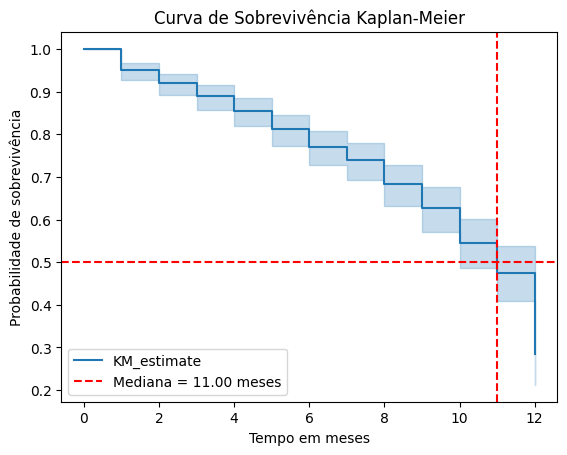

In [19]:
# Inicializando o estimador de Kaplan-Meier
kmf = KaplanMeierFitter()

# Ajustando o modelo aos dados (tempo de sobrevivência em meses e evento de churn)
kmf.fit(durations=df['tempo_sobrevivencia'], event_observed=df['churn'])

# Plotando a função de sobrevivência
kmf.plot_survival_function()

# Adicionando a mediana da sobrevivência à plotagem
median_survival_time = kmf.median_survival_time_
plt.axhline(y=0.5, color='r', linestyle='--')  # Linha horizontal em y=0.5
plt.axvline(x=median_survival_time, color='r', linestyle='--', label=f'Mediana = {median_survival_time:.2f} meses')  # Linha vertical na mediana

# Personalizando o gráfico
plt.title('Curva de Sobrevivência Kaplan-Meier')
plt.xlabel('Tempo em meses')
plt.ylabel('Probabilidade de sobrevivência')
plt.legend()

# Exibindo o gráfico
plt.show()

In [20]:
# Exibindo a função de sobrevivência como uma tabela
kmf.survival_function_

,KM_estimate
timeline,
0.0,1.000000
1.0,0.950000
2.0,0.920510
3.0,0.889382
4.0,0.855546
5.0,0.811738
6.0,0.770712
7.0,0.738599
8.0,0.683204


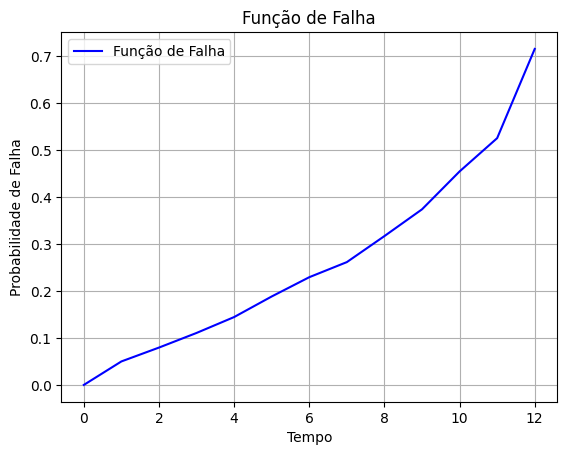

In [21]:
# Calculando a função de falha
failure_function = 1 - kmf.survival_function_

failure_function = failure_function.rename(columns={"KM_estimate": "probabilidade_falha"})

plt.plot(failure_function.index, failure_function['probabilidade_falha'], label="Função de Falha", color='blue')

plt.title("Função de Falha")
plt.xlabel("Tempo")
plt.ylabel("Probabilidade de Falha")
plt.legend()
plt.grid(True)
plt.show()

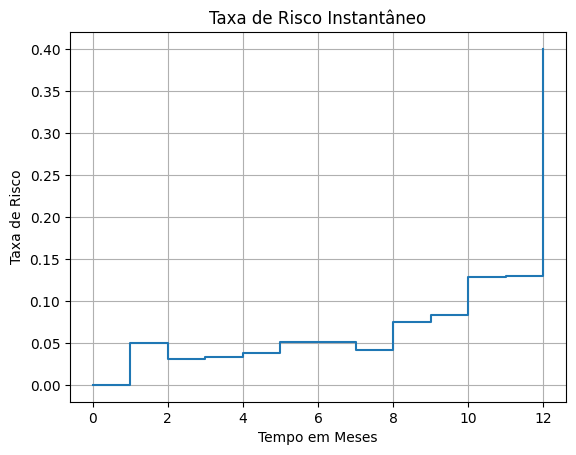

In [22]:
eventos = kmf.event_table['observed']
pessoas_em_risco = kmf.event_table['at_risk']

# Calculando a taxa de risco instantânea
taxa_de_risco = eventos / pessoas_em_risco

# Plotando a taxa de risco instantâneo
plt.step(taxa_de_risco.index, taxa_de_risco, where='post')
plt.title('Taxa de Risco Instantâneo')
plt.xlabel('Tempo em Meses')
plt.ylabel('Taxa de Risco')
plt.grid(True)
plt.show()


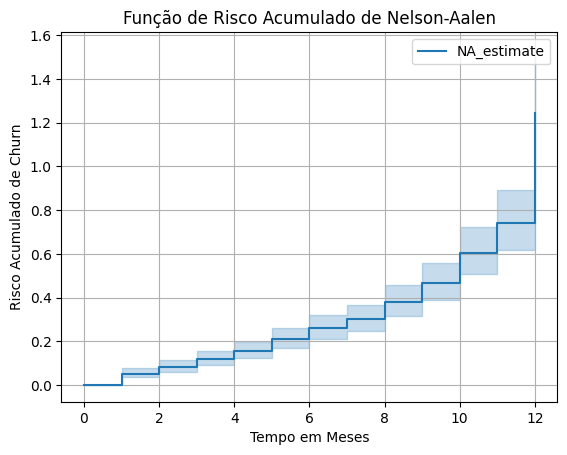

In [23]:
from lifelines import KaplanMeierFitter, CoxPHFitter, NelsonAalenFitter
from lifelines.statistics import logrank_test, proportional_hazard_test

naf = NelsonAalenFitter()

# Ajustando o modelo
naf.fit(df['tempo_sobrevivencia'], event_observed=df['churn'])

# Plotando a função de risco acumulado
naf.plot_cumulative_hazard()
plt.title('Função de Risco Acumulado de Nelson-Aalen')
plt.xlabel('Tempo em Meses')
plt.ylabel('Risco Acumulado de Churn')
plt.grid(True)
plt.show()